In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_df = pd.read_csv('ML-Book/Data/Advertising.csv')
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

In [7]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [8]:
Y = np.array((Y - Y.mean()) / Y.std())
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std(), axis = 0)

In [10]:
Y[:5]

array([ 1.54816813, -0.69430382, -0.90513451,  0.85817677, -0.21514314])

In [17]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


## Implementing the Gradient Descent Algorithm

### Step 1: Random Initialization of the Bias and Weights

In [11]:
import random
#dim - is the number of weights to be initialized besides the bias
def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)
    # Initialize the bias
    b = random.random()
    # Initialize the weights
    w = np.random.rand(dim)
    
    return b, w

In [12]:
b, w = initialize(3)
print('Bias : ', b, "Weights : ", w)

Bias :  0.6394267984578837 Weights :  [0.37454012 0.95071431 0.73199394]


### Step 2: Predict Y Values from the Bias and Weights

In [41]:
'''
Inputs:
b - bias
w - weights
X - the input matrix
'''

def predict_Y(b, w, X):
    return b + X.dot(w)

In [42]:
b, w = initialize(3)
Y_hat = predict_Y(b, w, X)
Y_hat[0:10]

0    3.231496
1    1.707849
2    2.824761
3    2.753090
4    0.924486
5    3.171365
6    0.622344
7   -0.349354
8   -2.313095
9   -0.768030
dtype: float64

### Step 3: Calculate the Cost function - MSE

In [43]:
import math

# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost(Y, Y_hat):
    # Calculating the residuals - difference between actual and predicted values
    Y_resid = Y - Y_hat
    
    return np.sum(np.matmul(Y_resid.T, Y_resid)) / len(Y_resid)

In [44]:
b, w = initialize(3)
Y_hat = predict_Y(b, w, X)
get_cost(Y, Y_hat)

1.5303100198505895

### Step 4: Update the Bias and Weights

In [45]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    # gradient of bias
    db = (np.sum(y_hat - y) * 2) / len(y)
    # gradient of weights
    dw = (np.dot((y_hat - y), x) * 2) / len(y)
    # update bias
    b_1 = b_0 - learning_rate * db
    w_1 = w_0 - learning_rate * dw
    
    # Return the new bias and beta values
    return b_1, w_1


In [46]:
b, w = initialize(3)
print('After Initialization - Bias: ', b, 'Weights: ', w)
y_hat = predict_Y(b, w, X)
b, w = update_beta(X, Y, Y_hat, b, w, 0.01)
print('After first update - Bias: ', b, 'Weights:', w)

After Initialization - Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261 Weights: [0.38079093 0.9376953  0.71484883]


### Finding the optimal Bias and Weights

In [49]:
def run_gradient_descent(X,
                        Y,
                        alpha = 0.01,
                        num_iterations = 100):
    # Initialize the bias and weights
    b, w = initialize(X.shape[1])
    iter_num = 0
    
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    result_idx = 0
    
    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calculate predicted value of y
        Y_hat = predict_Y(b, w, X)
        
        # Calculate the cost
        this_cost = get_cost(Y, Y_hat)
        
        # Save the previous bias and weights
        prev_b = b
        prev_w = w
        
        # Update and calculate the new values of bias and weights
        b, w = update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)
        
        # For every 10 iterations, store the cost i.e. MSE
        if(iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
            
        iter_num += 1
        
    print('Final estimate of b and w:', b, w)
    # return the fianl bias, weights and the cost at the end
    return gd_iterations_df, b, w

In [50]:
gd_iterations_df, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)

Final estimate of b and w: 0.42844895817391493 [0.48270238 0.75265969 0.46109174]


In [51]:
gd_iterations_df[:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


### Plotting the cost function against the Iterations

In [52]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Cost or MSE')

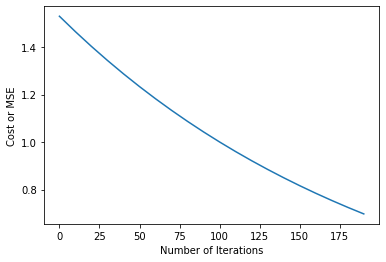

In [53]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost or MSE')

In [54]:
print('Final estimates of b and w:', b, w)

Final estimates of b and w: 0.42844895817391493 [0.48270238 0.75265969 0.46109174]


In [55]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)

Final estimate of b and w: 2.7728016698178713e-16 [ 0.75306591  0.53648155 -0.00433069]


In [56]:
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)

Final estimate of b and w: 0.011664695556930518 [0.74315125 0.52779959 0.01171703]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

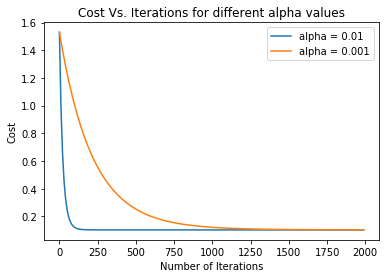

In [57]:
plt.plot(alpha_df_1['iteration'], alpha_df_1['cost'], label="alpha = 0.01")
plt.plot(alpha_df_2['iteration'], alpha_df_2['cost'], label="alpha = 0.001")
plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Cost Vs. Iterations for different alpha values')